In [1]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
#from seaborn import plt
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [7]:
from sklearn import neighbors, datasets
from sklearn.cross_validation import train_test_split


# Question 1 Section

In [4]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target

In [172]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=8)

# use array [,0]to keep track of neighbore and [,1] for the score of test dataset
neighbores = len(X_train)
scores = np.zeros((neighbores,2))
# Keep track the number of neighbore with highest test score
score_max = [] 


for n in range(neighbores):
    clf = neighbors.KNeighborsClassifier(n+1)
    clf.fit(X_train, y_train)    
    scores[n][0]=n+1 # keep track of neighbore
    scores[n][1]=clf.score(X_test, y_test) # keep track of test score
    
    #keep track the neighbore with highest test score
    if n== 0 :
        score_max.append((scores[n][0],scores[n][1]))
    else:
        if(scores[n][1] > score_max[0][1]):
            del score_max[:]
            score_max.append((scores[n][0],scores[n][1]))
        else:
            if(scores[n][1] == score_max[0][1]):
                score_max.append((scores[n][0],scores[n][1]))
                

#print scores
print score_max


[(7.0, 0.97368421052631582), (8.0, 0.97368421052631582), (9.0, 0.97368421052631582), (10.0, 0.97368421052631582), (19.0, 0.97368421052631582)]


# Question 2 Section

In [173]:
from sklearn.cross_validation import cross_val_score

# Try cross validation with neighbore number of 7
clf = neighbors.KNeighborsClassifier(7, weights='uniform')
clf.fit(iris.data, iris.target)
cross_scores = cross_val_score(clf, iris_df.values, iris.target, cv=5)

In [22]:
print cross_scores

[ 1.  1.  1.  1.  1.]


# Question 3 Section

In [176]:
# use array [,0]to keep track of neighbore and [,1] for the score of test dataset
# Since it is 5 folds, the max size of training dataset and neighbore is 120
cross_scores_N = np.zeros((120,2))
# Keep track the number of neighbore with highest test score
score_max_N = [] 

for n in range(120):
    clf = neighbors.KNeighborsClassifier(n+1,weights='uniform')
    #clf.fit(iris.data, iris.target)
    # keep track of neighbore
    cross_scores_N[n][0]= n+1
    # keep track of test score
    cross_scores_N[n][1]= cross_val_score(clf, iris_df.values, iris.target, cv=5).mean()

    #keep track the neighbore with highest test score
    if n== 0 :
        score_max_N.append((cross_scores_N[n][0],cross_scores_N[n][1]))
    else:
        if(cross_scores_N[n][1] > score_max_N[0][1]):
            del score_max_N[:]
            score_max_N.append((cross_scores_N[n][0],cross_scores_N[n][1]))
        else:
            if(cross_scores_N[n][1] == score_max_N[0][1]):
                score_max_N.append((cross_scores_N[n][0],cross_scores_N[n][1]))
                

#print cross_scores_N
print score_max_N

[(1.0, 1.0), (2.0, 1.0), (3.0, 1.0), (4.0, 1.0), (5.0, 1.0), (6.0, 1.0), (7.0, 1.0), (8.0, 1.0), (9.0, 1.0), (10.0, 1.0), (11.0, 1.0), (12.0, 1.0), (13.0, 1.0), (14.0, 1.0), (15.0, 1.0), (16.0, 1.0), (17.0, 1.0), (18.0, 1.0), (19.0, 1.0)]


# Question 4 Section

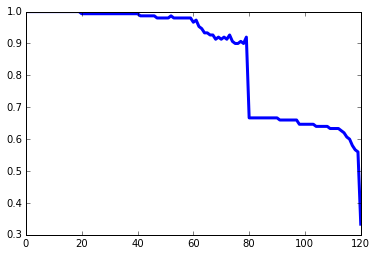

In [177]:
plt.plot(cross_scores_N[:,0], cross_scores_N[:,1], linewidth=3.0)

# Question 5 Section

In [179]:
# Randomly create 5 fold
import random



ori_len = len(iris.data)
iris_data_list = iris.data.tolist()
iris_target_list = iris.target.tolist()

each_fold_size = ori_len/5

random.seed(6)

# Keep track of 5 different training and testing dataset
train_X = []
train_y = []
test_X = []
test_y = []

# Hold one training and testing dataset
curr_train_X = []
curr_train_y = []
curr_test_X = []
curr_test_y = []

for i in range(5):
    #build training and testing dataset one at a time
    if len(curr_train_X) != 0:
        del curr_train_X[:]
        del curr_train_y[:]
        del curr_test_X[:]
        del curr_test_y[:]
    
      
    for j in range(ori_len):
        if j < int(i*each_fold_size):
            curr_train_X.append(iris_data_list[j])
            curr_train_y.append(iris_target_list[j])
        else:
            if j >= int((i+1)*each_fold_size):
                curr_train_X.append(iris_data_list[j])
                curr_train_y.append(iris_target_list[j])
            else:
                curr_test_X.append(iris_data_list[j]) 
                curr_test_y.append(iris_target_list[j])
                
    #Put a training and testing dataset into list    
    train_X.append(np.array(curr_train_X))
    test_X.append(np.array(curr_test_X))
    train_y.append(np.array(curr_train_y))
    test_y.append(np.array(curr_test_y))
    
    

In [143]:
#print range(1,30);
my_scores = np.array([[1,2,4,5],[4,5,6,7],[7,8,9,10]])
print np.mean(my_scores[0][1:3])


3.0


In [180]:
# Use array to hold 
# the number of neighbore [,0]
# fold 1 to fold 5 test score [,1:6]
# average of fold1 to fold 5 test score [,6]
my_scores = np.zeros((120,7))
# Keep track the number of neighbore with highest average test score from 1~5 fold test
my_scores_max = []

# number of neigbores go from 0 to numbers of data in training dataset
for n in range(0,120):
    my_scores[n][0]= n+1 # keep track of # of neighbores
    clf = neighbors.KNeighborsClassifier(n+1)
    for k in range(5): # go through each fold
        clf.fit(train_X[k], train_y[k])  
        my_scores[n][k+1]=clf.score(test_X[k], test_y[k])
    my_scores[n][6] = np.mean(my_scores[n][1:6]) # keep track of average score of 5 fold
    
    if n== 0 :
        my_scores_max.append((my_scores[n][0],my_scores[n][6]))
    else:
        if(my_scores[n][6] > my_scores_max[0][1]):
            del my_scores_max[:]
            my_scores_max.append((my_scores[n][0],my_scores[n][6]))
        else:
            if(my_scores[n][6] == my_scores_max[0][1]):
                my_scores_max.append((my_scores[n][0],my_scores[n][6]))


[(1.0, 0.92666666666666653)]


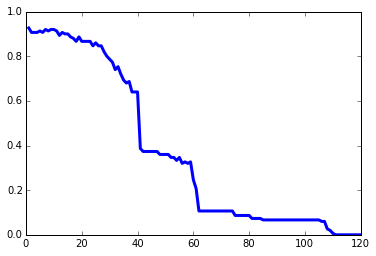

In [181]:
print my_scores_max
plt.plot(my_scores[:,0], my_scores[:,6], linewidth=3.0)